In [19]:
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_iris

names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']

iris = load_iris(as_frame=True)

iris = iris['frame']
iris = iris.set_axis(names, axis=1)

X = iris.iloc[:, :-1].values
y = iris.iloc[:, 4].values

In [46]:
iris.describe()

,sepal-length,sepal-width,petal-length,petal-width,Class
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


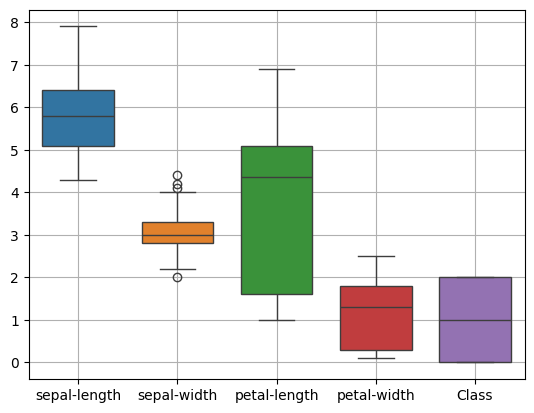

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(iris, width=0.8, gap=0.1)
plt.grid()
plt.show()

> 꽃받침의 너비는 특이값이 존재하며, 꽃잎의 길이는 하위 25%~중위값 사이 넓게 존재한다.

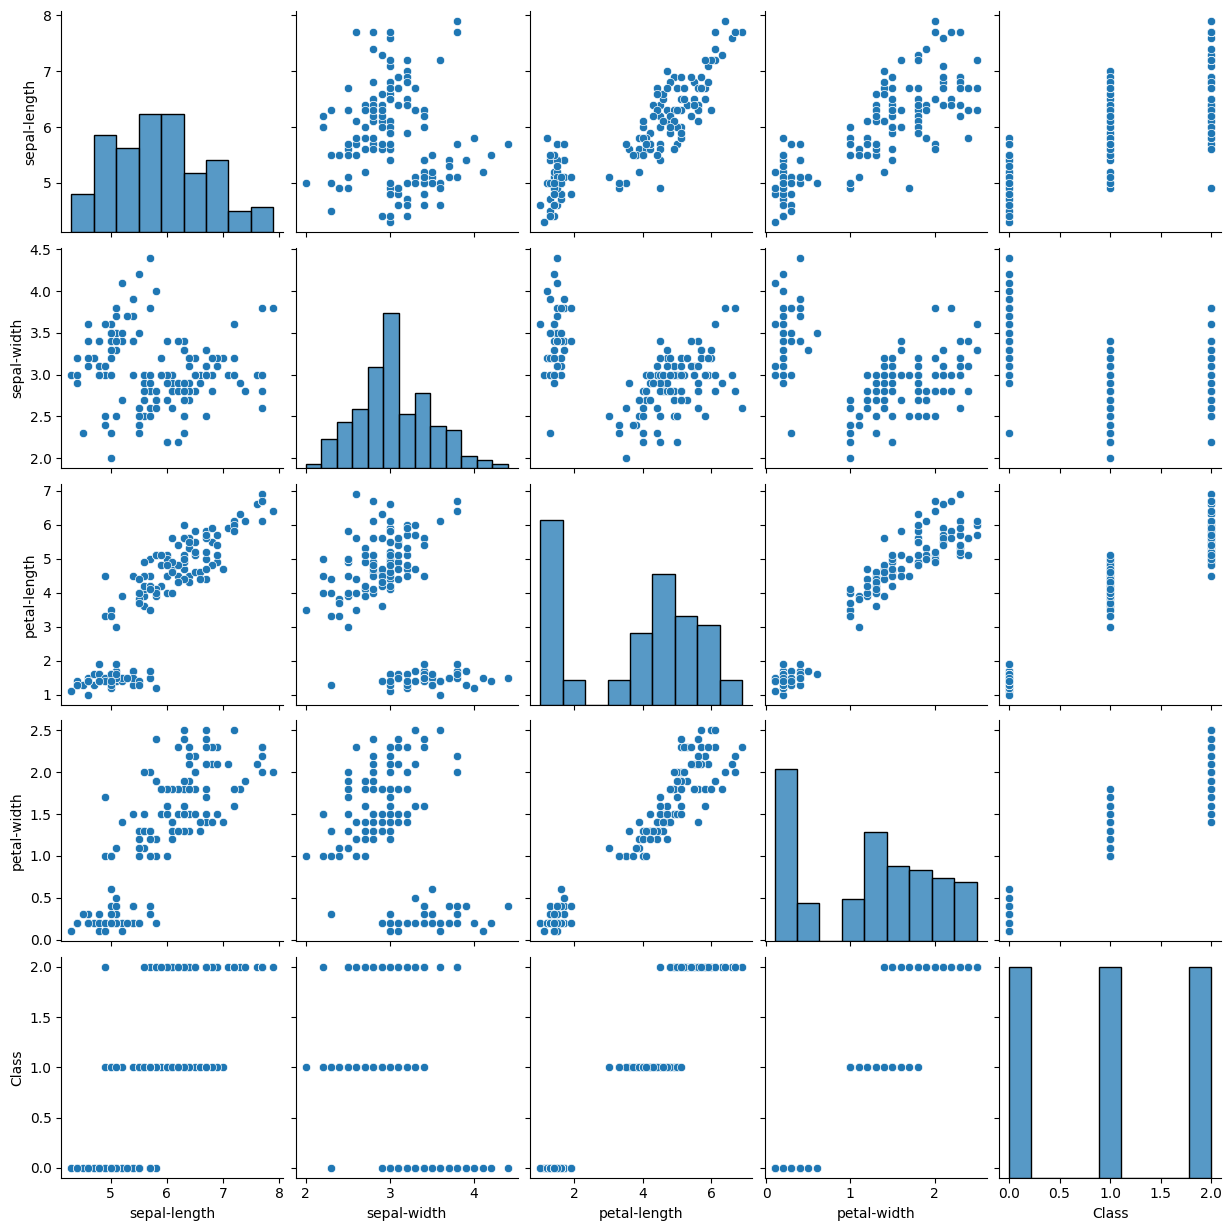

In [36]:
sns.pairplot(data=iris)

> Sepal-width를 제외하고 모두 세토사, 버시컬러, 버지니카 순으로 잎이 크고 넓음을 확인.
> 꽃잎너비는 버시컬러, 버지니카, 세토사 순으로 크기가 크다.
> 꽃잎의 크기는 길고 좁거나 크고넓음 둘로 분류 가능.

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [23]:
from sklearn.preprocessing import StandardScaler

sc_x = StandardScaler().fit(X_train)
X_train = sc_x.transform(X_train)
X_test = sc_x.transform(X_test)

In [26]:
iris = iris.dropna()

X = iris.drop('Class', axis=1)
y = iris['Class']

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [28]:
from sklearn import tree

model = tree.DecisionTreeClassifier()

In [29]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [30]:
y_predict = model.predict(X_test)

from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_predict)
# 학습률

0.9736842105263158

In [34]:
from sklearn.metrics import confusion_matrix

pd.DataFrame(
    confusion_matrix(y_test, y_predict),
    columns=['Setosa', 'Versicolor', 'Virginica'],
    index=['Setosa', 'Versicolor', 'Virginica']
)
# 혼동행렬

,Setosa,Versicolor,Virginica
Setosa,13,0,0
Versicolor,0,15,1
Virginica,0,0,9


In [ ]:
!pip install graphviz
!pip install pydotplus

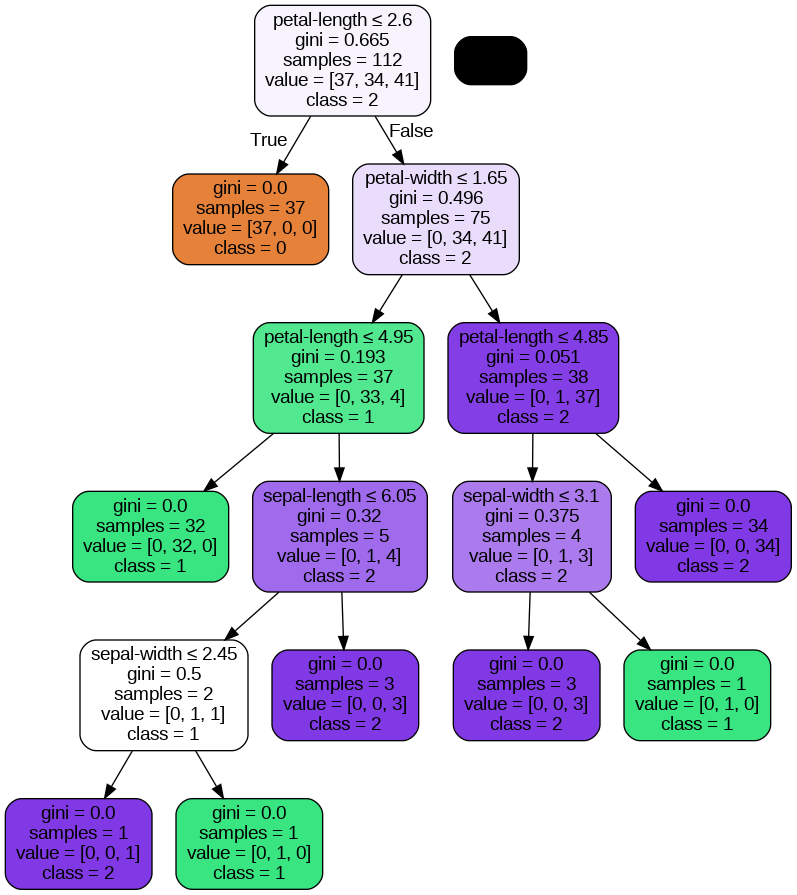

In [44]:
from sklearn.tree import export_graphviz

from six import StringIO
from IPython.display import Image
import pydotplus

dot_data = StringIO()
feature_cols = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width']
export_graphviz(model, out_file=dot_data,
                filled=True, rounded=True, feature_names = feature_cols,
                special_characters=True,class_names=['0','1', '2'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('iris_tree.png')
Image(graph.create_png())